In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
DataFrame = pd.read_csv('nobel.csv')

DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [3]:
DataFrame.head(5)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [4]:
null = DataFrame.isnull().sum()
print(null)
print('/n')
null.sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64
/n


1912

<IPython.core.display.Javascript object>


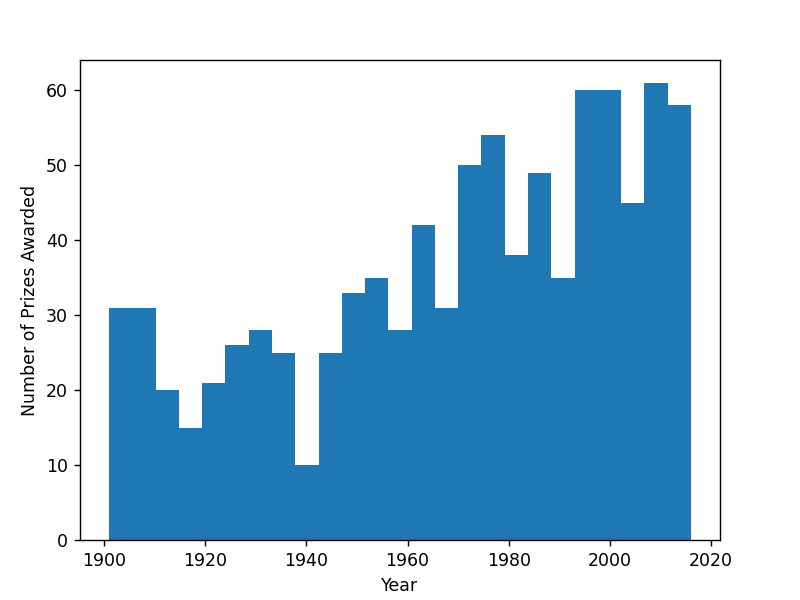

In [5]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.hist(DataFrame.year,bins = 25)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Prizes Awarded');

In [6]:
cat = DataFrame.groupby('category').count()

cat['prize']

category
Chemistry     175
Economics      78
Literature    113
Medicine      211
Peace         130
Physics       204
Name: prize, dtype: int64

In [7]:
share = DataFrame.groupby('prize_share').count()

100 * share.prize / share.prize.sum()

prize_share
1/1    37.760703
1/2    33.589462
1/3    22.063666
1/4     6.586169
Name: prize, dtype: float64

In [8]:
male = DataFrame[DataFrame['sex'] == 'Male']
female = DataFrame[DataFrame['sex'] == 'Female']
unknown = DataFrame[ (DataFrame['sex'] != 'Female') & (DataFrame['sex'] != 'Male')]

print('Males who won the prize: {0}'.format(male.prize.count()))
print('Females who won the prize: {0}'.format(female.prize.count()))
total = male.prize.count() + female.prize.count()

Males who won the prize: 836
Females who won the prize: 49


<IPython.core.display.Javascript object>


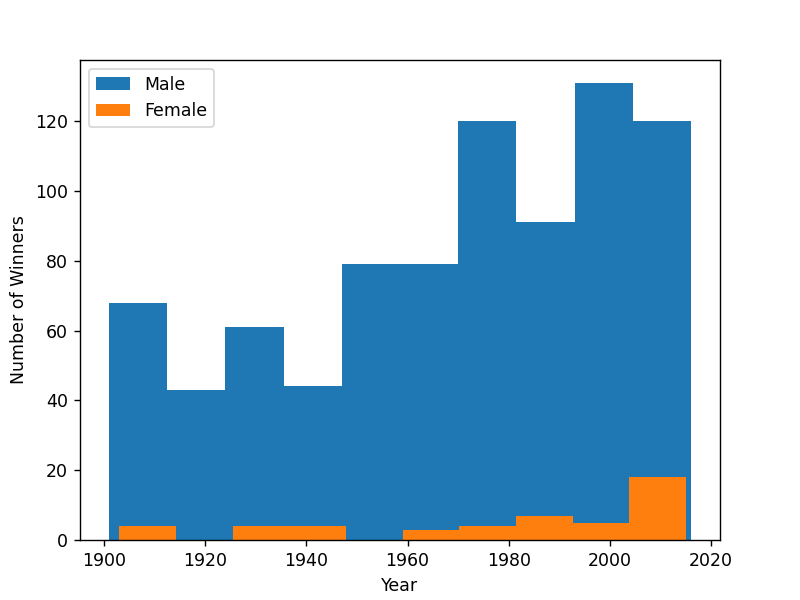

In [9]:
male_year = male.groupby('year').year.count() / total
female_year = female.groupby('year').year.count() / total

fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.hist(male.year,label = 'Male');
ax.hist(female.year,label = 'Female');
ax.set_xlabel('Year')
ax.set_ylabel('Number of Winners')
ax.legend();

In [10]:
sum(DataFrame['birth_country']=='United States of America')

259

In [11]:
year = DataFrame.year - pd.DatetimeIndex(DataFrame.birth_date).year

oldest = year.argmax()
youngest = year.argmin()

print('Oldest: {0}, {1} years old'.format(DataFrame['full_name'][oldest], year.max()))
print('Youngest: {0}, {1} years old'.format(DataFrame['full_name'][youngest], year.min()))
print('Average age: {0:.1f} years, {1:.1f} years deviation'.format(year.mean(), year.std()))

Oldest: Leonid Hurwicz, 90.0 years old
Youngest: Malala Yousafzai, 17.0 years old
Average age: 59.5 years, 12.4 years deviation


In [15]:
dfcopy = DataFrame.copy()

In [16]:
dfcopy = DataFrame.drop('laureate_id',axis=1,inplace = True)

KeyError: "['laureate_id'] not found in axis"

In [17]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_type         911 non-null    object
 6   full_name             911 non-null    object
 7   birth_date            883 non-null    object
 8   birth_city            883 non-null    object
 9   birth_country         885 non-null    object
 10  sex                   885 non-null    object
 11  organization_name     665 non-null    object
 12  organization_city     667 non-null    object
 13  organization_country  667 non-null    object
 14  death_date            593 non-null    object
 15  death_city            576 non-null    ob

In [18]:
dfcopy['Award Age'] = year

dfcopy

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,Award Age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,49.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,62.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,47.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,73.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN,71.0
907,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN,65.0
908,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN,82.0
909,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN,65.0
